In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df= pd.read_excel('dfwavgscores.xlsx')

Rearrange order of columns -put asdage with other demographic    

**I want to get back all the asbg10 ones - they are useful** 
## I can use the differing demographic data to see if there is that affects experience in schools and reading scores. 
Should also compare reading scores with the benchmark and can also compare with previous years.
If I get data from different dates maybe I can practice the time/date stuff. change asbh02a to immigrant/ non - immigrant

## Demographic stuff

In [2]:
demographic_info_columns = ['Country', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03','MINAGEARRIVAL', 'rounded_ages','ASDAGE','avgscore']

In [3]:
df_demo = df[demographic_info_columns]

In [4]:
iran = df_demo[df_demo['Country']=='Iran']

In [5]:
pivot_langoftest = df_demo.pivot_table(values='avgscore', index=['Country','ASBH02A'],columns=['ASBH04'] )

In [6]:
pivot_langoftest

ASBH04                      1.0         2.0         3.0         4.0
Country     ASBH02A                                                
Austria     No       526.568683  499.076921  489.982926  518.437218
            Yes      548.440280  513.888546  477.016948  459.554538
Egypt       No       380.287685  359.878675  377.917497  263.399871
            Yes      381.613082  380.178017  382.486908  362.437696
France      No       511.447470  496.336046  458.852563  487.225042
            Yes      524.655744  505.915474  467.705766  496.661765
Jordan      No       384.344459  375.184140  380.041626  350.377802
            Yes      370.903979  356.796237  360.648001  325.172960
Netherlands No       538.941632  545.478924  491.142007  530.608261
            Yes      545.374390  545.130593  541.409542  556.160668
Sweden      No       545.221577  507.098497  501.383882  534.593889
            Yes      571.743100  541.003457  538.147637  541.857496

In [7]:
pivot_parentlevelofedu = df_demo.pivot_table(values='avgscore', index=['Country','ASBH02A'],columns=['ASBH15A','ASBH15B'] )

In [8]:
pivot_parentlevelofedu

ASBH15A                    1.0                                       \
ASBH15B                    1.0         2.0         3.0         4.0    
Country     ASBH02A                                                   
Austria     No       435.659564         NaN         NaN  528.195355   
            Yes      420.646031         NaN         NaN  408.735574   
Egypt       No       404.327629  296.456540         NaN  482.771890   
            Yes      343.547233  332.637388  341.394762  349.928624   
France      No       498.387656         NaN  368.374409         NaN   
            Yes      505.283577  591.382984         NaN  489.685435   
Jordan      No       336.795693  353.869954  411.155682  303.974172   
            Yes      299.282079  320.698007  319.931453  350.161576   
Netherlands No              NaN         NaN         NaN         NaN   
            Yes      525.952762         NaN         NaN         NaN   
Sweden      No       498.779777         NaN         NaN         NaN   
            Yes      475.466987         NaN         NaN  560.624655   

ASBH15A                                                              \
ASBH15B                    5.0         6.0         7.0         9.0    
Country     ASBH02A                                                   
Austria     No              NaN         NaN         NaN         NaN   
            Yes             NaN         NaN         NaN         NaN   
Egypt       No              NaN         NaN  372.002924         NaN   
            Yes      362.071663  275.321025         NaN  317.194583   
France      No              NaN         NaN         NaN         NaN   
            Yes             NaN         NaN  442.321528         NaN   
Jordan      No       468.744458         NaN  261.597630  370.530445   
            Yes      380.395070  362.018027  347.698645  334.524347   
Netherlands No              NaN  497.568294         NaN         NaN   
            Yes             NaN         NaN         NaN         NaN   
Sweden      No              NaN         NaN         NaN  349.611278   
            Yes             NaN         NaN         NaN         NaN   

ASBH15A                                2.0                           \
ASBH15B                    10.0        1.0         2.0         3.0    
Country     ASBH02A                                                   
Austria     No              NaN         NaN  484.186130  472.363134   
            Yes             NaN  591.224610  491.087455  474.696791   
Egypt       No              NaN         NaN         NaN         NaN   
            Yes      373.473437  340.340349  359.251851  355.051628   
France      No              NaN  415.984152  482.578884  543.540855   
            Yes             NaN  465.053132  475.471547  559.233620   
Jordan      No       479.301391  356.527073  345.672318  350.577212   
            Yes      277.618539  289.773675  308.076817  326.277388   
Netherlands No              NaN         NaN         NaN         NaN   
            Yes             NaN         NaN  462.156375  452.698908   
Sweden      No              NaN  594.196354  493.267757  505.379508   
            Yes             NaN  577.202528  518.817013  575.314595   

ASBH15A                                                              \
ASBH15B                    4.0         5.0         6.0         7.0    
Country     ASBH02A                                                   
Austria     No       389.176339         NaN         NaN         NaN   
            Yes      465.956626  542.575546  594.325635  441.959557   
Egypt       No       455.213302  347.536216  343.340501         NaN   
            Yes      364.825985  304.838652  336.854821  514.854116   
France      No       554.655328         NaN  543.676189         NaN   
            Yes      486.634570         NaN  510.463941         NaN   
Jordan      No       313.215371  293.284828  481.762655  418.547075   
            Yes      307.070362  318.749128  405.056936  397.888121   
Netherlands No       

I need to remove missing values for this stuff to actually be interesting. 

In [9]:
pivot_table_test = df_demo.pivot_table(
    index=['Country','ASBH02A'],
    aggfunc=lambda x: x.isnull().sum(),
)

In [10]:
# Calculate the total number of elements in each group
total_counts = df_demo.groupby(['Country','ASBH02A']).size()

# Calculate the percentage of missing values
percentage_missing = pivot_table_test.div(total_counts, axis=0) * 100

print("Pivot Table with Percentage of Missing Values:\n", percentage_missing)

Pivot Table with Percentage of Missing Values:
                          ASBG01      ASBG03     ASBH02B   ASBH03A      ASBH04  \
Country     ASBH02A                                                             
Austria     No         0.000000    0.886918    0.665188  2.439024    0.221729   
            Yes        0.149068    0.521739  100.000000  0.944099    0.993789   
Egypt       No         1.413428   13.780919   22.261484  9.540636    5.300353   
            Yes        1.286947   12.530052  100.000000  2.149625    2.531467   
France      No         2.479339    2.892562    6.611570  2.066116    2.479339   
            Yes        1.988511    2.121078  100.000000  3.689792    3.490941   
Germany     No        11.616162   12.121212    0.000000  0.000000  100.000000   
            Yes        6.344411    7.207596    0.000000  0.000000  100.000000   
Iran        No       100.000000  100.000000    0.000000  0.000000  100.000000   
            Yes      100.000000  100.000000    0.017483  0.00

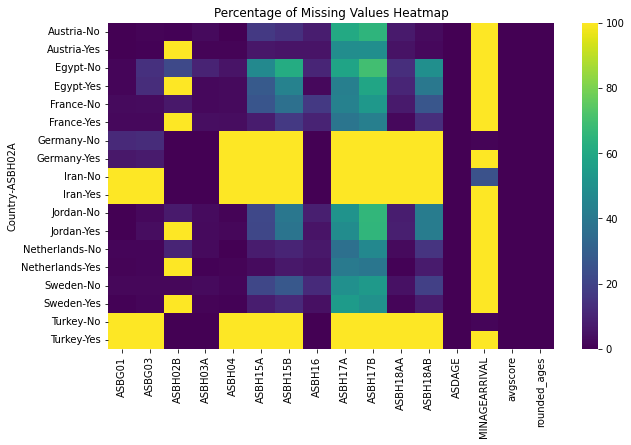

In [11]:
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(percentage_missing, annot=False, cmap='viridis', fmt='.2f')

plt.title('Percentage of Missing Values Heatmap')
plt.show()

I also need to remove values that are '6', meaning nan.

In [12]:
df_demo['ASBH15A'].value_counts()

4.0     7199
7.0     3747
8.0     3086
6.0     2898
3.0     1883
5.0     1285
1.0     1009
2.0      959
9.0      727
10.0     212
Name: ASBH15A, dtype: int64

10 is not applicable - remove?

In [13]:
df_demo['ASBH15B'].value_counts()

4.0     6447
7.0     3019
8.0     2614
6.0     2570
3.0     1725
5.0     1163
1.0     1025
2.0      846
9.0      619
10.0     235
Name: ASBH15B, dtype: int64

hope for level of education - child

In [14]:
df_demo['ASBH16'].value_counts()

6.0    16120
5.0    10986
4.0     4586
2.0     4469
3.0     2411
1.0     1071
9.0      242
Name: ASBH16, dtype: int64

Let's drop all the values that have 9s - omitted. I'm not sure if this is really what I want to do but let's see. 

In [15]:
df_demo.shape 

(41365, 18)

In [16]:
# Columns to check
columns_to_check = ['ASBH02A','ASBH02B','ASBH03A','ASBH04','ASBH16','ASBH18AA','ASBH18AB']

# Drop rows where any of the specified columns have a value of 9.0
condition = (df_demo[columns_to_check] != 9.0).all(axis=1)
df_cleaned = df_demo.loc[condition]
df_cleaned.shape

(40810, 18)

In [17]:
# Columns to check
columns_to_check2 = ['ASBH15A','ASBH15B','ASBH17A','ASBH17B']

# Drop rows where any of the specified columns have a value of 999.0
condition = (df_cleaned[columns_to_check2] != 999.0).all(axis=1)
df_cleaned2 = df_cleaned.loc[condition]
df_cleaned2.shape

(40810, 18)

let's look at the columns that all countries have answers for - 02B - age when arrived in country and 3a speaking lang of test before school? check this!

In [18]:
pivot_ageofarrival = df_cleaned2.pivot_table(values='avgscore', index=['Country','ASBH02A'],columns=['ASBH02B'] )

In [19]:
pivot_ageofarrival

ASBH02B                       1           2           3           4  \
Country     ASBH02A                                                   
Austria     No              NaN         NaN         NaN         NaN   
Egypt       No              NaN         NaN         NaN         NaN   
France      No              NaN         NaN         NaN         NaN   
Germany     No       521.986539  490.961791  485.084177  517.617192   
            Yes             NaN         NaN         NaN         NaN   
Iran        No       415.102270  429.928154  450.368901  421.684960   
            Yes             NaN         NaN         NaN         NaN   
Jordan      No              NaN         NaN         NaN         NaN   
Netherlands No              NaN         NaN         NaN         NaN   
Sweden      No              NaN         NaN         NaN         NaN   
Turkey      No       460.361803  439.893039  471.000542  446.103548   
            Yes             NaN         NaN         NaN         NaN   

ASBH02B                       6  3 to 5 years old  6 to 7 years old  \
Country     ASBH02A                                                   
Austria     No              NaN        503.023525        482.467533   
Egypt       No              NaN        360.526565        353.167965   
France      No              NaN        500.251059        487.735549   
Germany     No              NaN               NaN               NaN   
            Yes      547.194744               NaN               NaN   
Iran        No              NaN               NaN               NaN   
            Yes      423.246228               NaN               NaN   
Jordan      No              NaN        385.670465        381.076742   
Netherlands No              NaN        510.434272        532.347393   
Sweden      No              NaN        506.832225        496.426190   
Turkey      No              NaN               NaN               NaN   
            Yes      507.296871               NaN               NaN   

ASBH02B              8 years old or older  Younger than 3 years old  
Country     ASBH02A                                                  
Austria     No                 472.698753                524.691549  
Egypt       No                 359.496124                382.087467  
France      No                 449.952812                514.789067  
Germany     No                        NaN                       NaN  
            Yes                       NaN                       NaN  
Iran        No                        NaN                       NaN  
            Yes                       NaN                       NaN  
Jordan      No                 372.786823                380.605999  
Netherlands No                 529.268667                546.704431  
Sweden      No                 486.933911                547.588860  
Turkey      No                        NaN                       NaN  
            Yes                       NaN                       NaN

I need to do some more cleaning if I'm getting results like this! Should not have yesses, and I guess I didn't change all results to ordinal....

In [20]:
pivot_langoftest = df_cleaned2.pivot_table(values='avgscore', index=['Country','ASBH02A'],columns=['ASBH03A'] )

In [21]:
pivot_langoftest

ASBH03A                      No         Yes
Country     ASBH02A                        
Austria     No       487.644450  519.200136
            Yes      472.403527  540.354807
Egypt       No       381.043511  372.595149
            Yes      375.918329  381.073185
France      No       488.363427  502.055537
            Yes      485.858645  523.752310
Germany     No       490.241179  517.378624
            Yes      521.262006  547.694411
Iran        No       445.175716  424.108638
            Yes      362.092439  433.785116
Jordan      No       341.963226  383.829266
            Yes      343.067021  368.516474
Netherlands No       492.096739  558.039226
            Yes      523.447747  545.748518
Sweden      No       486.508932  534.645708
            Yes      520.077984  567.317763
Turkey      No       436.301444  477.771726
            Yes      472.809233  509.617613

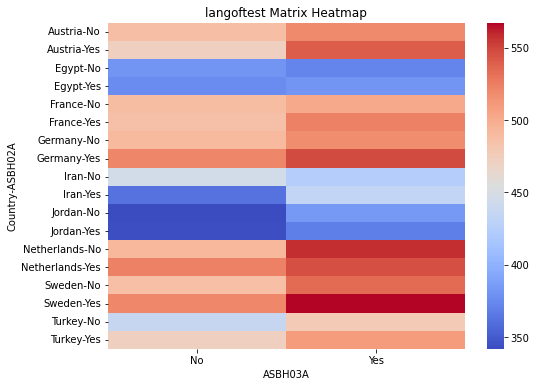

In [22]:
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(pivot_langoftest, annot=False, cmap='coolwarm')

# Add a title
plt.title('langoftest Matrix Heatmap')

# Show the plot
plt.show()

Again I want to put the yesses on top of the nos. And do I want to arange the order?

Let's do a pivot adding the lang of test column to the index. 

In [23]:
pivot_age = df_cleaned2.pivot_table(values='avgscore', index=['Country','ASBH02A','ASBH03A'],columns=['ASBH02B'] )

In [24]:
pivot_age

ASBH02B                               1           2           3           4  \
Country     ASBH02A ASBH03A                                                   
Austria     No      No              NaN         NaN         NaN         NaN   
                    Yes             NaN         NaN         NaN         NaN   
Egypt       No      No              NaN         NaN         NaN         NaN   
                    Yes             NaN         NaN         NaN         NaN   
France      No      No              NaN         NaN         NaN         NaN   
                    Yes             NaN         NaN         NaN         NaN   
Germany     No      No       476.433523  479.096577  493.483810  513.570106   
                    Yes      535.905516  504.409033  428.386658  532.996119   
            Yes     No              NaN         NaN         NaN         NaN   
                    Yes             NaN         NaN         NaN         NaN   
Iran        No      No       449.042156  423.910298         NaN         NaN   
                    Yes      395.452862  430.931130  450.368901  421.684960   
            Yes     No              NaN         NaN         NaN         NaN   
                    Yes             NaN         NaN         NaN         NaN   
Jordan      No      No              NaN         NaN         NaN         NaN   
                    Yes             NaN         NaN         NaN         NaN   
Netherlands No      No              NaN         NaN         NaN         NaN   
                    Yes             NaN         NaN         NaN         NaN   
Sweden      No      No              NaN         NaN         NaN         NaN   
                    Yes             NaN         NaN         NaN         NaN   
Turkey      No      No       434.833735  424.972245  449.835047  438.480252   
                    Yes      478.231450  458.415403  504.865334  476.596734   
            Yes     No              NaN         NaN         NaN         NaN   
                    Yes             NaN         NaN         NaN         NaN   

ASBH02B                               6  3 to 5 years old  6 to 7 years old  \
Country     ASBH02A ASBH03A                                                   
Austria     No      No              NaN        494.308674        481.718981   
                    Yes             NaN        519.999563        476.836095   
Egypt       No      No              NaN        451.677954        344.251120   
                    Yes             NaN        364.784658        363.090716   
France      No      No              NaN        497.966867        480.563434   
                    Yes             NaN        507.607066        502.591298   
Germany     No      No              NaN               NaN               NaN   
                    Yes             NaN               NaN               NaN   
            Yes     No       521.262006               NaN               NaN   
                    Yes      547.694411               NaN               NaN   
Iran        No      No              NaN               NaN               NaN   
                    Yes             NaN               NaN               NaN   
            Yes     No       362.092439               NaN               NaN   
                    Yes      433.785116               NaN               NaN   
Jordan      No      No              NaN        335.557872        296.327625   
                    Yes             NaN        388.140161        381.225548   
Netherlands No      No              NaN        461.987874        516.640614   
                    Yes             NaN        560.201145        573.185017   
Sweden      No      No              NaN        480.995103        494.305812   
                    Yes             NaN        525.082727        512.185393   
Turkey      No      No              NaN               NaN               NaN   
                    Yes             NaN               NaN               NaN   
            Yes     No       472.809233          

This is a mess. Should I use minagearrival instead?

In [26]:
pivot_minage

MINAGEARRIVAL                   0.0         3.0         6.0         8.0
Country ASBH02A ASBH03A                                                
Germany No      No       476.433523  479.096577  493.483810  513.570106
                Yes      535.905516  504.409033  428.386658  532.996119
Iran    No      No       449.042156  423.910298         NaN         NaN
                Yes      395.452862  430.931130  450.368901  421.684960
Turkey  No      No       434.833735  424.972245  449.835047  438.480252
                Yes      478.231450  458.415403  504.865334  476.596734

# check length of column before doing the below

In [27]:
df_cleaned2['MINAGEARRIVAL'].value_counts()

0.0    162
3.0    143
6.0    102
8.0     54
Name: MINAGEARRIVAL, dtype: int64

In [28]:
df_cleaned2['ASBH02B'].value_counts()

6                           12935
Younger than 3 years old      928
3 to 5 years old              692
6 to 7 years old              375
8 years old or older          186
1                             162
2                             143
3                             102
4                              54
Name: ASBH02B, dtype: int64

In [29]:
def populate_column(row):
    if row['ASBH02B'] == 'Younger than 3 years old':
        return 0
    elif row['ASBH02B'] == '3 to 5 years old':
        return 3
    elif row['ASBH02B'] == '6 to 7 years old':
        return 6
    elif row['ASBH02B'] == '8 years old or older':
        return 8
    else:
        return row['MINAGEARRIVAL']  

# Apply the function to each row
df_cleaned2['MINAGEARRIVAL'] = df_cleaned2.apply(populate_column, axis=1)

In [30]:
df_cleaned2['MINAGEARRIVAL'].value_counts()

0.0    1090
3.0     835
6.0     477
8.0     240
Name: MINAGEARRIVAL, dtype: int64

In [31]:
pivot_minage = df_cleaned2.pivot_table(values='avgscore', index=['Country','ASBH02A','ASBH03A'],columns=['MINAGEARRIVAL'] )

In [32]:
pivot_minage

MINAGEARRIVAL                       0.0         3.0         6.0         8.0
Country     ASBH02A ASBH03A                                                
Austria     No      No       505.358548  494.308674  481.718981  459.636767
                    Yes      536.893376  519.999563  476.836095  494.666639
Egypt       No      No       420.965479  451.677954  344.251120  315.121095
                    Yes      377.764044  364.784658  363.090716  373.492396
France      No      No       509.389980  497.966867  480.563434  441.401581
                    Yes      518.136501  507.607066  502.591298  460.836196
Germany     No      No       476.433523  479.096577  493.483810  513.570106
                    Yes      535.905516  504.409033  428.386658  532.996119
Iran        No      No       449.042156  423.910298         NaN         NaN
                    Yes      395.452862  430.931130  450.368901  421.684960
Jordan      No      No       358.681840  335.557872  296.327625         NaN
                    Yes      381.228918  388.140161  381.225548  372.786823
Netherlands No      No       495.711171  461.987874  516.640614  455.186952
                    Yes      573.700863  560.201145  573.185017  564.915606
Sweden      No      No       489.325033  480.995103  494.305812  484.776417
                    Yes      551.372226  525.082727  512.185393  497.553281
Turkey      No      No       434.833735  424.972245  449.835047  438.480252
                    Yes      478.231450  458.415403  504.865334  476.596734

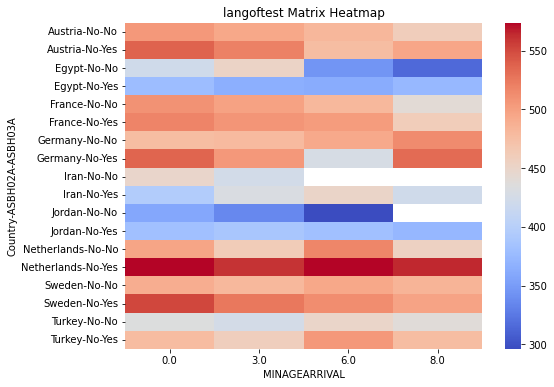

In [33]:
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(pivot_minage, annot=False, cmap='coolwarm')

# Add a title
plt.title('langoftest Matrix Heatmap')

# Show the plot
plt.show()

I want to sort the order of the above out and also see if I can get a comparison with the yes yes results. - we could call them arriving at -1? for the purposes of this? 

In [ ]:
correlation_matrix = df_demo.corr()

In [ ]:
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)

# Add a title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

`ASBH02A	GEN\CHILD BORN IN <COUNTRY>\
ASBH02B	GEN\AGE OF CHILD WHEN CAME TO <COUNTRY>\
ASBH03A	GEN\LANGUAGE<LANGUAGE OF TEST>\
ASBH04	GEN\HOW OFTEN <LANG OF TEST> AT HOME\
ASBH15A	GEN\LVL OF EDUCATIONGUARDIAN A\
ASBH15B	GEN\LVL OF EDUCATIONGUARDIAN B\
ASBH16	GEN\LVL OF EDUCATIONCHILD\
ASBH17A	GEN\WHAT KIND OF MAIN JOB\GUARDIAN A\
ASBH17B	GEN\WHAT KIND OF MAIN JOB\GUARDIAN B\
ASBH18AA	GEN\LANGUAGE SPOKEN<LANGUAGE OF TEST>GUARDIAN A\
ASBH18AB	GEN\LANGUAGE SPOKEN<LANGUAGE OF TEST>GUARDIAN B\
ASBH18BA	GEN\LANGUAGE SPOKEN<COUNTRY-SPECIFIC>GUARDIAN A\
ASBH18BB	GEN\LANGUAGE SPOKEN<COUNTRY-SPECIFIC>GUARDIAN B`

With the above I just want to focus on the bottom row really - remove the rest? There is a light negative correlation between speaking the language of test at home and the average score. Also those whose parents have more education have performed better overall. However, we can only use numerical columns for a correlation matrix. For non-numerical columns we can try the methods below.

# Non-numeric

## The below is for comparing columns that are non-numeric. It might be worthwhile to hot-code!? these columns so that we can do .corr with them. Like the ones above. I also want to look at the ones above in more detail.

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['ASBH02A'], df['avgscore'])

In [ ]:
# Perform Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [ ]:
print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-value: {p}")

## Interpretation

Chi-Square Test Statistic: 41365.00000000001
P-value: 0.49630132644040176

The P-value of approximately 0.496 suggests that there is a 49.6% chance of obtaining a Chi-Square Test Statistic of 41365 or higher under the assumption that the null hypothesis is true (i.e., there is no association between the variables). Since this P-value is much larger than 0.05, we do not have enough evidence to reject the null hypothesis.

Conclusion
There is no significant association between the variables in the contingency table. The high Chi-Square Test Statistic value seems unusual given the high P-value, which suggests that there might be an issue with the data or the way the test was performed. It might be useful to recheck the data or the contingency table to ensure there are no errors or anomalies.

In [ ]:
# Create a box plot
sns.boxplot(x=df['avgscore'])

# Add title and labels
plt.title('Box Plot of Your Data')
plt.xlabel('Data')
plt.ylabel('Values')

# Show the plot
plt.show()

Interpretation
Central Box: Represents the interquartile range (IQR), containing the middle 50% of the data.
Line inside the Box: Indicates the median of the data.
Whiskers: Extend to the smallest and largest values within 1.5 * IQR from the lower and upper quartiles.
Dots outside the Whiskers: Represent potential outliers.


## do a scatter plot\ ask chatgpt about regression and clustering

## want to do experiment with crosstab - adding more columns

I think my data is normally distributed because there is an obvious dip for specific countries but there are no crazy dips or heights that are not normal for the country. 

In [ ]:
import plotly.express as px

# Create a contingency table with the original data
contingency_table = pd.crosstab(df['ASBH02A'], df['avgscore'])

# Convert the contingency table to a format suitable for Plotly
contingency_table_reset = contingency_table.reset_index()
contingency_table_melted = contingency_table_reset.melt(id_vars='ASBH02A', var_name='avgscore', value_name='count')

# Plot the heatmap using Plotly
fig = px.density_heatmap(contingency_table_melted, x='ASBH02A', y='avgscore', z='count', color_continuous_scale='coolwarm')
fig.update_layout(title='Heatmap of Frequency Counts')
fig.show()

In [ ]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Create a confusion matrix
confusion_matrix = pd.crosstab(df['ASBH02A'], df['avgscore'])

# Calculate Cramér's V
cramers_v_value = cramers_v(confusion_matrix)
print(f"Cramér's V: {cramers_v_value}")

In [ ]:
# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap for Encoded Categorical Data')
plt.show()

In [ ]:
# Sample a subset of the data
df_sample = df.sample(n=10)  # Adjust the sample size as needed

# Create a contingency table with the sample
contingency_table = pd.crosstab(df_sample['ASBH02A'], df_sample['avgscore'])

# Plot the heatmap with the sample
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=False, cmap='coolwarm')
plt.title('Heatmap of Frequency Counts')
plt.show()